Steps: Load the dataset

Data Preprocessing:

Handle missing values (if any).

Feature selection (select the most relevant features).

Normalize the data (using StandardScaler).

Build a Linear Regression Model to predict house prices based on selected features.

Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared score.


Step 1: Load the Dataset:
Here's the code to load and inspect the dataset:



In [20]:
import pandas as pd


# Load the dataset
df = pd.read_csv('BostonHousing.csv')
print(df.head())

print(df.info())  # To check for missing values and data types

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [32]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


Step 2: Data Preprocessing

2.1 Feature Selection

We will select the most relevant features for predicting house prices. The most commonly used features from the Boston dataset include:



RM: Average number of rooms per dwelling.

LSTAT: Percentage of lower-status population.

PTRATIO: Pupil-teacher ratio by town.

DIS: Distance to employment centers.

TAX: Property tax rate.

In [22]:
# Select relevant features and the target variable
X = df[['rm', 'lstat', 'ptratio', 'dis', 'tax']]  # Features
y = df['medv']  # Target variable (house prices)

2.2 Normalization (Standardization)
We need to normalize the features so that they have similar scales, which helps improve the performance of the model.

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

Step 3: Build a Linear Regression Model

Step 4: Evaluate the Model
Let's evaluate the model's performance using the Mean Squared Error (MSE) and R-squared (R²) score.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 27.04
R-squared: 0.63


Visualizing Actual vs Predicted Prices (Optional)

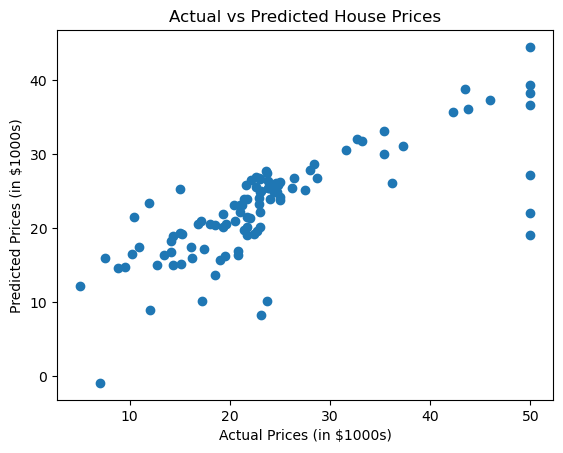

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices (in $1000s)")
plt.ylabel("Predicted Prices (in $1000s)")
plt.title("Actual vs Predicted House Prices")
plt.show()